<a href="https://colab.research.google.com/github/rendiprayoga/AMNT-/blob/master/Anstat_COF2_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats, integrate
sns.set(color_codes=True) 

In [36]:
Data_Calibration_raw = pd.read_excel('Calibration Data COF2.xls')
Data_Calibration_raw.head()
Data_Calibration = Data_Calibration_raw[Data_Calibration_raw['Cu_Grade'] < 1]
Data_Calibration.head()

,"SAMPLE_ID,C,10","SMPL_DATE,D","SMPL_TIME,C,8","COUNT_TIME,N,19,4","LTR,N,19,4","TOTAL,N,19,4","CAKA,N,19,4","FEKA,N,19,4","FEKB,N,19,4","NIKA,N,19,4","CUKA,N,19,4","CUKB,N,19,4","PBLA,N,19,4","ASKB,N,19,4","ULA,N,19,4","PBLB,N,19,4","ULARAY,N,19,4","ULB,N,19,4","PBLG,N,19,4","ULBRAY,N,19,4","ROI16,N,19,4","ROI17,N,19,4","ROI18,N,19,4","ROI19,N,19,4","ROI20,N,19,4","ROI21,N,19,4","ROI22,N,19,4","ROI23,N,19,4","ROI24,N,19,4","FWHM1,N,19,4","CENTROID1,N,19,4","FWHM2,N,19,4","CENTROID2,N,19,4","AMBITEMP,N,19,4","BRDTEMP,N,19,4","SLRYTEMP,N,19,4","DETTEMP,N,19,4","PREATEMP,N,19,4","DETVCOOL,N,19,4","PREACOOL,N,19,4",...,"ACCE3,N,19,4","AIRPRESS,N,19,4","AIRHUMID,N,19,4","PSVOLT1,N,19,4","PSVOLT2,N,19,4","PSVOLT3,N,19,4","AI_12,N,19,4","PSCURR1,N,19,4","PSCURR2,N,19,4","PSCURR3,N,19,4","AI_16,N,19,4","WRNLMP1,N,19,4","WRNLMP2,N,19,4","NPTSANLGI,N,19,4","NPTSNITON,N,19,4","SDAMBITEMP,N,19,4","SDBRDTEMP,N,19,4","SDSLRYTEMP,N,19,4","SDDETTEMP,N,19,4","SDPREATEMP,N,19,4","SDDETVCOOL,N,19,4","SDACCE1,N,19,4","SDACCE2,N,19,4","SDACCE3,N,19,4","SDAIRPRESS,N,19,4","SDAIRHUMID,N,19,4","SDPSVOLT1,N,19,4","SDPSVOLT2,N,19,4","SDPSVOLT3,N,19,4","SDAI_12,N,19,4","SDPSCURR1,N,19,4","SDPSCURR2,N,19,4","SDPSCURR3,N,19,4","SDAI_16,N,19,4","SDWRNLMP1,N,19,4","SDWRNLMP2,N,19,4",Cu_Grade,%Solid,Si_Grade,Fe_Grade
1,COF2.1,2020-02-24,11:03:35,311.81,0.9740,2282.3340,5.2093,292.3771,56.8902,6.9314,42.3787,8.7491,2.7759,29.9648,262.8799,48.1379,105.8415,1002.6507,28.5027,167.7335,212.7861,32.5365,0.5301,4.2774,2.8220,7.3200,0.5598,0.0000,0.0000,145.9667,470.8685,225.7672,1265.3268,25.8207,31.2834,34.6171,-23.6034,20.4653,1.4393,99.0000,...,0.0908,99.8000,11.4910,3.3031,23.3208,8.9034,0,324.5436,226.6536,315.4132,0,141.6242,376.3106,59,240,0.0250,0.8858,0.0824,0.0126,0.1179,0.0049,0.0241,0.0296,0.0318,0.0113,0.1800,0.0007,0.0078,0.0070,0,7.9471,2.0808,7.1079,0,0.2170,0.9397,0.258,41.0623,26.8025,4.61
3,COF2.2,2020-02-24,15:52:34,318.22,0.9750,2186.2221,5.2823,301.6179,58.4665,6.5328,48.2822,9.9394,2.7749,28.4968,244.6726,44.7467,101.2279,936.3091,26.4567,159.0982,197.7214,31.5264,0.5382,4.2381,2.5912,7.4384,0.6478,6.7068,5.7335,146.8501,470.8033,222.2377,1265.1176,22.6293,28.0937,34.6270,-23.6033,14.9374,1.2599,61.7406,...,0.0823,99.4581,16.1561,3.3039,23.4037,8.9096,0,321.3616,221.3173,304.6704,0,142.4565,365.6941,64,248,0.0234,0.8764,0.0998,0.0121,0.0516,0.0008,0.0257,0.0322,0.0278,0.0103,0.1811,0.0007,0.0679,0.0082,0,8.5656,2.8822,6.6942,0,0.2170,3.0495,0.300,46.1626,24.8678,4.53
9,COF2.6,2020-03-04,09:15:15,317.46,0.9754,2147.8007,5.2383,321.0050,61.6167,6.7110,47.6844,9.9212,3.9304,30.9165,234.9212,43.7443,97.9266,890.9023,25.5329,155.8649,185.5671,29.4600,0.5167,13.2218,4.5504,7.3925,0.6427,6.8725,6.1620,147.5943,470.7950,222.2390,1264.8871,20.9449,27.0972,34.6014,-23.6297,15.0122,1.2586,41.8987,...,0.0954,99.8636,5.0497,3.3043,23.4614,8.9096,0,321.6413,220.1408,303.5529,0,143.2555,356.3909,61,245,0.0287,0.9257,0.0560,0.0150,0.0662,0.0035,0.0243,0.0311,0.0336,0.0124,0.1748,0.0007,0.0680,0.0088,0,8.7795,2.8347,6.7392,0,0.2233,1.1371,0.282,46.4601,0.0000,5.04
10,COF2.7,2020-03-04,10:36:24,318.09,0.9749,2182.5132,5.2528,311.5375,59.9929,7.1940,47.8944,10.0574,4.1371,31.9231,242.4965,44.8826,100.1354,915.6617,25.9803,158.5838,193.4380,30.1593,0.4418,13.1884,4.1049,7.4423,0.6449,6.8490,6.1718,147.4348,470.7827,221.9348,1265.0144,21.5612,27.5601,34.0594,-23.6244,15.1676,1.2606,49.1648,...,0.0975,99.8106,5.0353,3.3042,23.4344,8.9094,0,322.6079,220.9693,302.7905,0,143.1223,353.7513,61,242,0.0364,0.8773,0.1028,0.0161,0.0701,0.0024,0.0274,0.0335,0.0335,0.0115,0.1618,0.0007,0.0686,0.0079,0,8.6242,2.9008,6.7099,0,0.2170,0.9088,0.286,51.4729,0.0000,4.95
11,COF2.8,2020-03-04,11:13:18,313.65,0.9750,2180.6808,5.0227,308.7930,59.9915,6.8899,49.0566,10.3626,3.8651,32.0493,241.3459,44.6388,98.8391,920.7024,26.2091,157.4147,191.9983,30.4732,0.4840,11.3338,4.1137,7.5047,0.6932,6.8278,5.9187,147.3755,470.7988,216.4399,1265.0969,22.1844,27.7348,34.4282,-23.6272,15.2057,1.2

Buat Grid Grade

#Splitting the dataset into the Training set and Test set

In [40]:
X = Data_Calibration[['Cu_Grade']]
y = Data_Calibration[['CUKA,N,19,4']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



# Training the Simple Linear Regression on the Training Set

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = regressor.predict(X_test)

#Visualising the Training set results

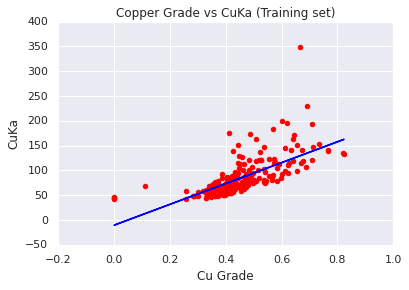

In [44]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Copper Grade vs CuKa (Training set)')
plt.xlabel('Cu Grade')
plt.ylabel('CuKa')
plt.show()

# Visualising the Test set results

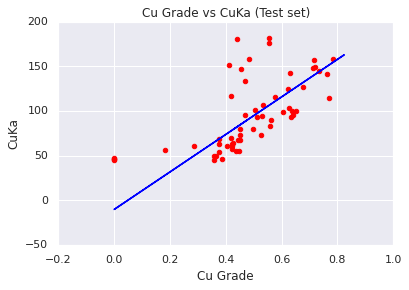

In [45]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Cu Grade vs CuKa (Test set)')
plt.xlabel('Cu Grade')
plt.ylabel('CuKa')
plt.show()